### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

       country  beer_servings  spirit_servings  wine_servings   
0  Afghanistan              0                0              0  \
1      Albania             89              132             54   
2      Algeria             25                0             14   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
106.16062176165804
49.45077720207254
80.99481865284974
country                         Andorra
beer_servings                       245
spirit_servings                     138
wine_servings                       312
total_litres_of_pure_alcohol       12.4
alcohol_index                       695
Name: 3, dtype: object


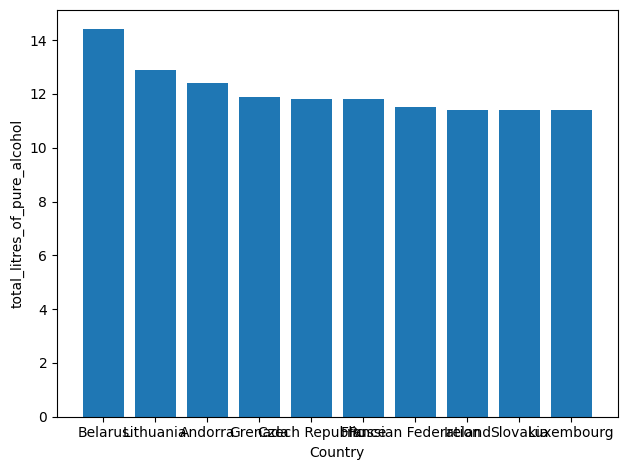

([], [])

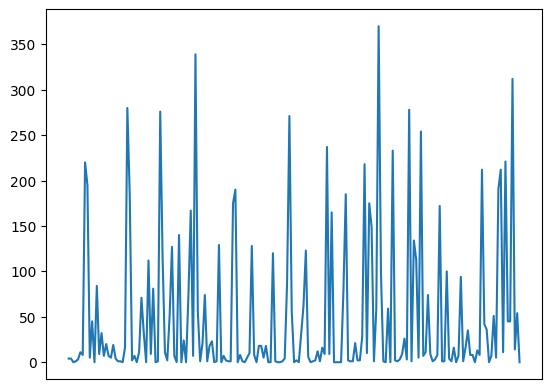

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
print(df.head(3))

index = df['total_litres_of_pure_alcohol'].sort_values(ascending=False).head(10).index

#print(df.loc[index])

print(df['beer_servings'].mean())
print(df['wine_servings'].mean())
print(df['spirit_servings'].mean())

df['alcohol_index'] = df['beer_servings'] + df['wine_servings'] + df['spirit_servings']
#print(df.head(3))

index1 = df['alcohol_index'].argmax()
print(df.loc[index1])

#print(df[df['beer_servings'] > 100])

top10 = df.loc[index]
#print(top10['country'])
plt.bar(top10['country'], top10['total_litres_of_pure_alcohol'])
plt.xlabel('Country')
plt.ylabel('total_litres_of_pure_alcohol')
plt.tight_layout()
plt.show()

index2 = df['country'].sort_values(ascending=False).index
wine = df.loc[index2]

plt.plot(wine['country'], wine['wine_servings'])
plt.xticks([])

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

job_title_short
Senior Data Scientist        154206.292996
Senior Data Engineer         145840.611624
Data Scientist               135988.837171
Data Engineer                130125.604250
Machine Learning Engineer    126774.315972
Senior Data Analyst          113911.363665
Software Engineer            113393.760054
Cloud Engineer               111268.453846
Data Analyst                  93841.907854
Business Analyst              91082.612833
Name: salary_year_avg, dtype: float64


<Figure size 500x500 with 0 Axes>

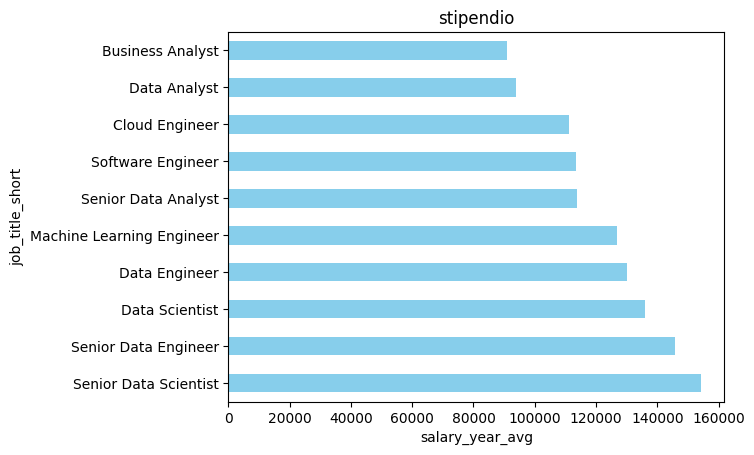

<Figure size 500x500 with 0 Axes>

In [102]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.dropna()
#print(df.groupby('job_country')['salary_year_avg'].mean())

#print(df.head(3))
df.groupby('job_country')['job_title_short'].count()

max = df.groupby('job_country')['salary_year_avg'].max()
min = df.groupby('job_country')['salary_year_avg'].min()
avg = max - min
#print(avg)

stipendio = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)
print(stipendio)

stipendio.plot(kind='barh', color='skyblue')
plt.xlabel('salary_year_avg')
plt.ylabel('job_title_short')
plt.title('stipendio')
plt.figure(figsize=(5,5))